## Extreme Gradient boosting

### Classification with XGBoost

In [1]:
# Import xgboost
import xgboost
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.preprocessing import StandardScaler
import numpy as np

iris = datasets.load_iris()
print(iris.keys())
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y,test_size = 0.25, random_state = 0) ##Keep class proportions via the stratify term
scaler = StandardScaler().fit(X_train) #Fit a scaler for 
X_train_scaled = scaler.transform(X_train) #Transform training data
X_test_scaled = scaler.transform(X_test) #Transform testing data

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [2]:
for eta in [0.3,5,10,0.03]:
    xg_cl = xgboost.XGBClassifier(booster= "gbtree",eta = eta,objective='multi:softprob', verbosity=0, n_estimators=50, seed=123,use_label_encoder=False)
    xg_cl.fit(X_train_scaled,y_train)
    preds = xg_cl.predict(X_test_scaled)
    accuracy = accuracy_score(y_test,preds)
    print("eta: {} ,accuracy: {:.2f} %".format(eta, accuracy * 100))

eta: 0.3 ,accuracy: 94.74 %
eta: 5 ,accuracy: 94.74 %
eta: 10 ,accuracy: 76.32 %
eta: 0.03 ,accuracy: 100.00 %


### Regression with XGBoost

In [3]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error as MSE
from sklearn.datasets import load_diabetes
data = load_diabetes()
X , y = data.data , data.target
print(X.shape)
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.25, random_state = 0)

(442, 10)


In [4]:
xgb_reg = xgboost.XGBRegressor(n_estimators=300, max_depth=5, eta=0.03) #Build the model
xgb_reg.fit(X_train,y_train) # Fit the model
preds = xgb_reg.predict(X_test) #Get predictions
RMSE = MSE(y_test,preds) ** 0.5 # Root mean squared error
print(RMSE)

62.55405297311964


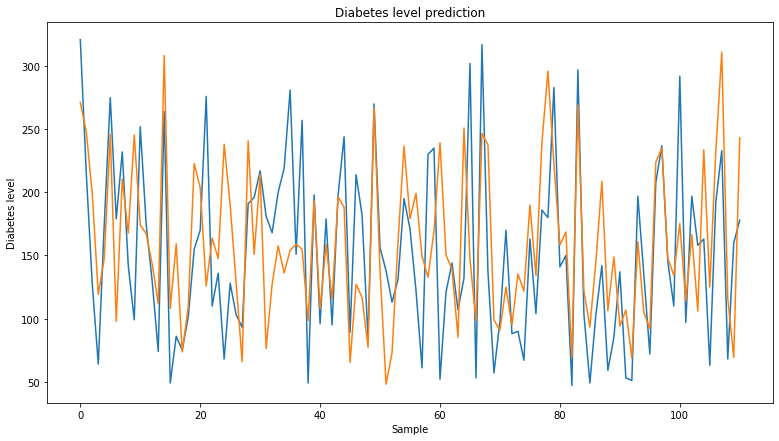

In [5]:
import matplotlib.pyplot as plt
plt.figure(figsize=(13,7))
plt.plot(range(len(X_test)),y_test)
plt.plot(range(len(X_test)),preds)
plt.xlabel('Sample')
plt.ylabel('Diabetes level')
plt.title('Diabetes level prediction')
plt.show()

## Clustering

### Hiearchical clustering

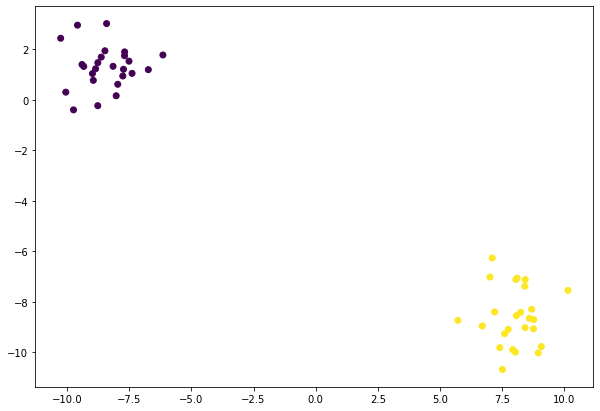

In [6]:
from scipy.cluster.hierarchy import dendrogram, linkage,fcluster
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from pandas import DataFrame
# generate 2d classification dataset
X, y = make_blobs(n_samples=50, centers=2, n_features=2)
##GENERATE TWO REGIONS

plt.figure(figsize=(10, 7))
plt.scatter(X[:,0],X[:,1],c=y)
plt.show()

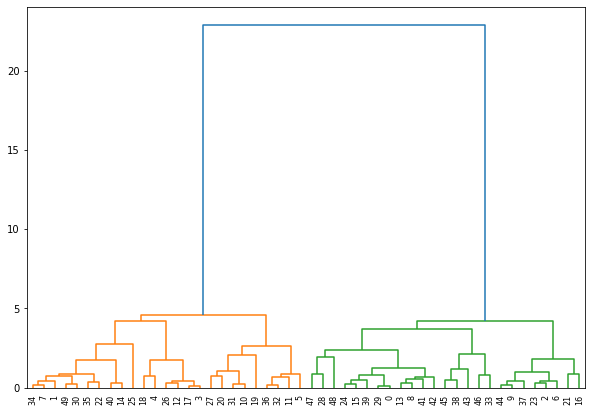

In [7]:
distances = linkage(X, method = 'complete')

cluster_labels = fcluster(distances, 2, criterion='maxclust')

plt.figure(figsize=(10, 7))
dendrogram(distances,
            orientation='top',
            distance_sort='descending',
            show_leaf_counts=True)
plt.show()

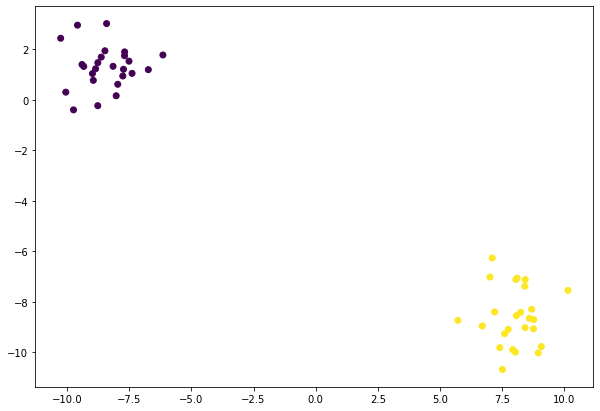

In [8]:
plt.figure(figsize=(10, 7))
plt.scatter(X[:,0],X[:,1],c=cluster_labels)
plt.show()

### Kmeans Clustering

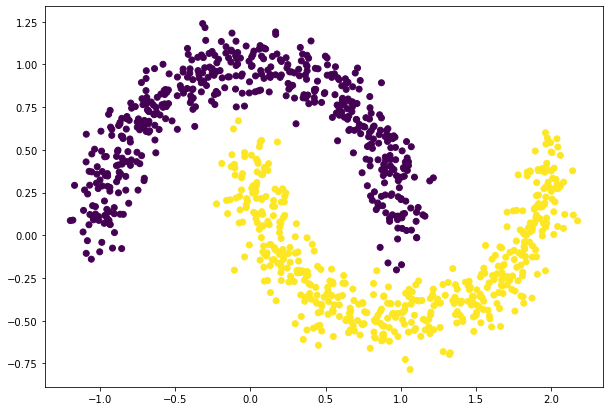

In [9]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples = 1000,noise=0.1)
plt.figure(figsize=(10, 7))
plt.scatter(X[:,0],X[:,1],c=y)
plt.show()

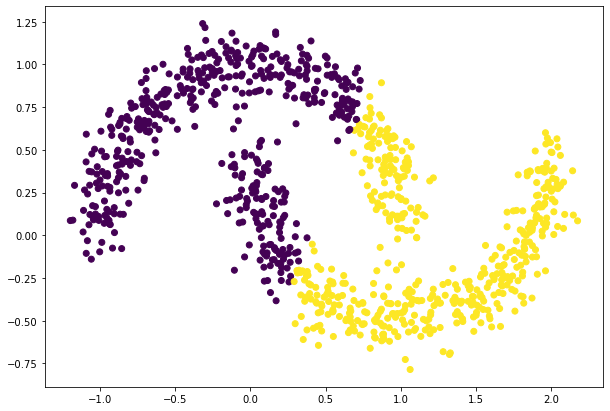

In [10]:
# Import the kmeans and vq functions
from scipy.cluster.vq import vq,kmeans
np.random.seed(50)
# Generate cluster centers
cluster_centers, distortion = kmeans(X,2)

# Assign cluster labels
cluster_labels , distortion_list = vq(X,cluster_centers)

plt.figure(figsize=(10, 7))
plt.scatter(X[:,0],X[:,1],c=cluster_labels)
plt.show()